Upvote if you Like it **<p style="color:red">For The Horde ;)</p>**

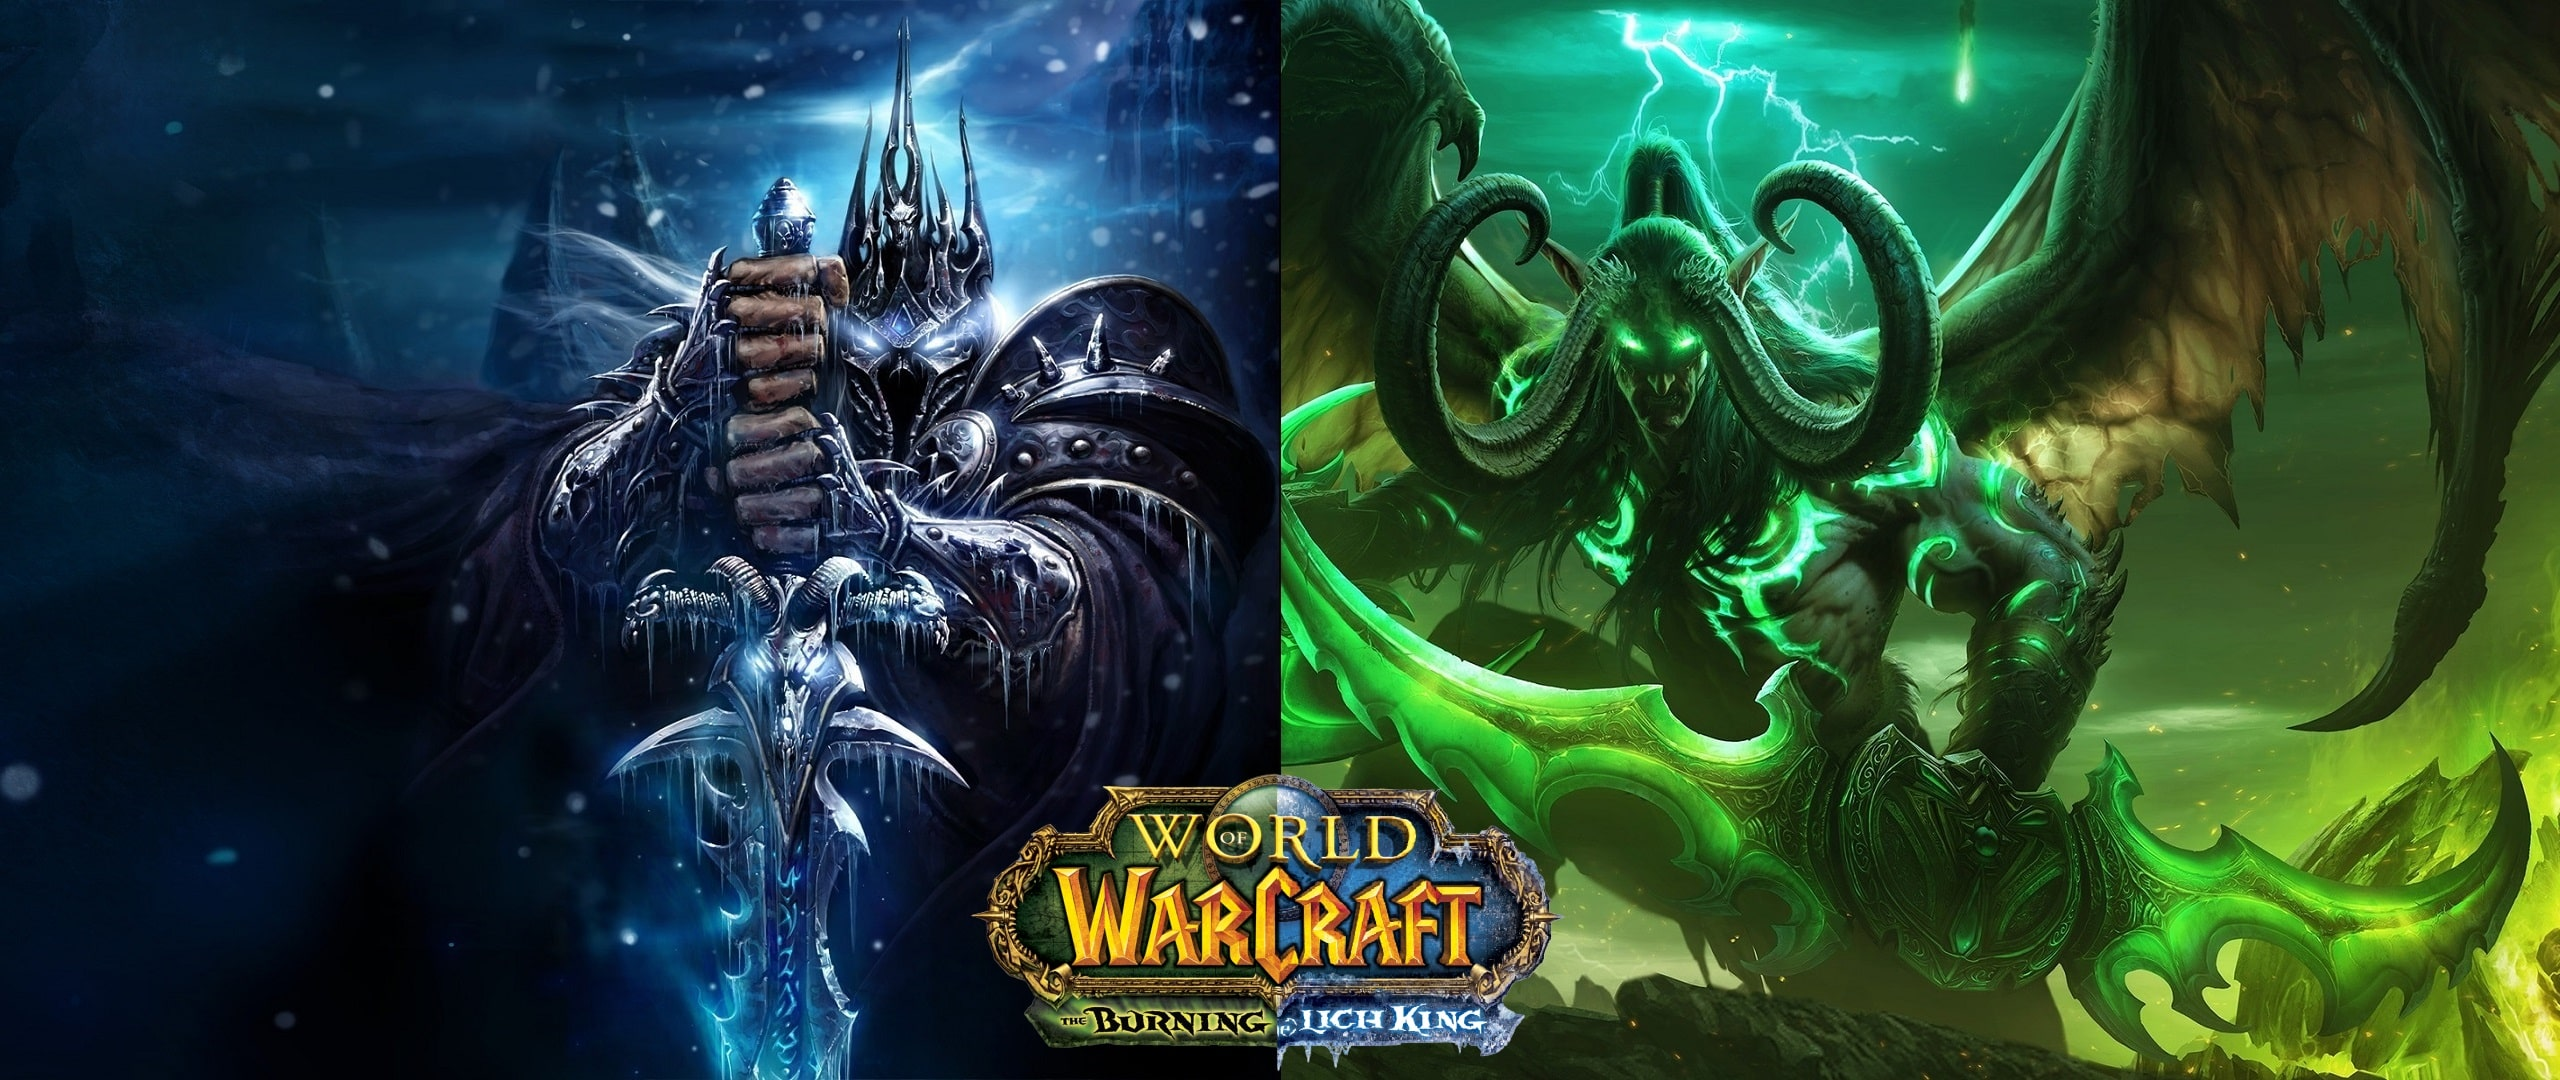

World of Warcraft is a massively multiplayer online role-playing game developed by Blizzard Entertainment and released in North America on November 23, 2004 and remains valid today.

The developers keep the game alive by rigorously adding content and new stories across extensions like The Burning Crusade, Wrath of The Lich King, Cataclysm etc.

Each extension adds new areas to explore, new stories, intrigue and adventure, changes and improvements in the way we play.

I started the game in 2008 with Wrath of The Lich King and I loved it and since then I play when I have free periods.

The data in this notebook is information on the behavior of players from one of the two factions "The Horde" in 2008 where the game saw the end of the Burning Crusade expansion and the start of Wrath of The Litch King on 11 October 2008 for only one specific server.

In [ ]:
# import som Libraries

import pandas as pd
import pandas_profiling as pp
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from datetime import timedelta
import tqdm
import numpy as np

!pip install pyvis

from pyvis.network import Network
import pyvis


import os
for dirname, _, filenames in os.walk('/kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [ ]:
# Read Data and make som updates

location_coords = pd.read_csv('../input/warcraft-avatar-history/location_coords.csv',  encoding='windows-1252')
locations = pd.read_csv('../input/warcraft-avatar-history/locations.csv',  encoding='windows-1252')
wowah_data = pd.read_csv('../input/warcraft-avatar-history/wowah_data.csv',  encoding='windows-1252')
zones = pd.read_csv('../input/warcraft-avatar-history/zones.csv',  encoding='windows-1252')

location_coords.columns = location_coords.columns.str.replace(' ', '')
locations.columns = locations.columns.str.replace(' ', '')
wowah_data.columns = wowah_data.columns.str.replace(' ', '')
zones.columns = zones.columns.str.replace(' ', '')

wowah_data['timestamp'] = pd.to_datetime(wowah_data['timestamp'])
wowah_data['dates'] = wowah_data['timestamp'].dt.date
wowah_data.loc[wowah_data['timestamp'] >= '2008-11-18','extention'] = 'WOTLK'
wowah_data.loc[wowah_data['timestamp'] < '2008-11-18', 'extention'] = 'BC'

dict_color = {'Death Knight': '#C41F3B',
                'Shaman': '#0070DE',
                'Druid': '#FF7D0A',
                'Rogue': '#FFF569',
                'Priest': '#FFFFFF',
                'Paladin': '#F58CBA',
                'Warrior': '#C79C6E',
                'Warlock': '#8787ED',
                'Mage': '#40C7EB',
                'Hunter': '#A9D271'}

wowah_data['Class_color']  = wowah_data.charclass.map(dict_color)

wowah_data['Date'] =  pd.to_datetime(wowah_data['timestamp'], format='%Y-%m-%d')
wowah_data["Day_of_Week"] = wowah_data.Date.dt.weekday
wowah_data["First_day_of_the_week"] = wowah_data.Date - wowah_data.Day_of_Week * timedelta(days=1)
wowah_data.drop(['Day_of_Week', 'Date'], axis = 1, inplace = True)
wowah_data["First_day_of_the_week"] = wowah_data["First_day_of_the_week"].dt.date

col = {}
import random
for i in wowah_data.zone.unique() :
    color = "%06x" % random.randint(0, 0xFFFFFF)
    col[i] = '#' + color 
wowah_data['color_zone'] = wowah_data['zone'].map(col)

# Races and Classes Population

In [ ]:
tmp = pd.DataFrame(wowah_data.groupby(['race']).count()['char']).reset_index().sort_values(by = 'char')
tmp['char_%'] = tmp['char'].div(tmp.char.sum())*100
tmp.drop(['char'], axis = 1, inplace = True)
Dataplot = pd.DataFrame(wowah_data.groupby(['race', 'charclass']).count()['char']).reset_index().sort_values(by = 'char')

fig = px.bar(tmp.merge(Dataplot, left_on = 'race', right_on = 'race' ), x='race', y='char',
             hover_data=['race', 'char'], color = 'charclass',  color_discrete_map =  dict_color,
             labels={'char':'Character Race Population', 'charclass': 'Character Class', 'rece' : 'Character Race'}, height=500)

fig.add_trace(go.Scatter(
    x=['Orc', 'Troll', 'Tauren', 'Undead', 'Blood Elf'],
    y=[1000000, 1200000, 2500000, 2700000, 4000000],
    text=pd.DataFrame(tmp['char_%'].round(1).astype(str) + '%')['char_%'].values,
    mode="text",
))

fig.show()

del Dataplot, tmp

* The blood elves is the most widespread class in the games, it is not very surprising given their elegance and the approximation of the physique of a simple human unlike the rest of the horde races which are mainly humanoids in addition it is the only race with which we can play the paladin class with 1 million paladin blood elf.

* in second position we find the undead which can be understood because they are stylish in class casters like warlock, mage and priest and even in thief, it is confirmed because these the main classes of undead.

* In third position is the tauren, I think it is mainly because we can play the druid class with which is the most flexible class of the game.

* Last we find the orcs and trolls in my opinion their estitique at this period was not very well done, changes that improved that we were done much later but in 2008 it was not very beautiful in addition they do not don't have a class exclusive to them.

In [ ]:
Dataplot = pd.DataFrame(wowah_data.groupby('charclass').count()['char']).reset_index().sort_values(by = 'char')
Dataplot['pers'] = Dataplot['char'].div(108267.34).round(1).astype(str) + '%'

fig = px.bar(Dataplot, x='charclass', y='char', color = 'charclass',
             hover_data=['charclass', 'char'], 
             color_discrete_map =  dict_color,
             labels={'char':'Class Population', 'charclass' : 'Class', 'pers' : 'Percentage'}, height=400, text = 'pers')

datatmp1 = wowah_data[wowah_data['timestamp'] < '2008-11-18'].groupby([pd.Grouper(key='timestamp', freq='19d'), 'charclass']).count().reindex().groupby('charclass').mean()
datatmp1['pers'] = datatmp1['char'].div(datatmp1.char.sum()/100).round(1).astype(str) + '%'
datatmp2 = wowah_data[wowah_data['timestamp'] >= '2008-11-18'].groupby([pd.Grouper(key='timestamp', freq='30d'), 'charclass']).count().reindex().groupby('charclass').mean()
datatmp2['pers'] = datatmp2['char'].div(datatmp2.char.sum()/100).round(1).astype(str) + '%'

datatmp1['ext'] = 'BC'
datatmp2['ext'] = 'WOTLK'
Dataplot = pd.concat([datatmp1,datatmp2]).reset_index()

fig2 = px.bar(Dataplot, x='charclass', y='char', color = 'charclass',
             hover_data=['charclass', 'char'], 
             color_discrete_map =  dict_color, facet_row='ext',
             labels={'char':'Class Population', 'charclass' : 'Class', 'ext' : 'Extention', 'pers' : 'Percentage'}, height=400, text = 'pers')
fig.show()
fig2.show()

del Dataplot, datatmp1, datatmp2



During all the year 2008 the most played class is the hunter because it was the class which inflicted the most damage to the enemies with a great utility brought to the members of its group. The hunter is a class of dps (damage per second) which inflicts physical damage from a distance and which can tame a fart which it uses for many things. it has 3 specializations with a different gameplay.

In third and fourth position we find the mage and the warlok who are distant dps like the hunter and who inflicts magic damage to enemies. the mage uses legal magic like frost, fire and arcane unlike warlok which uses forbidden demon magic like demonology, affliction and destruction.

In 4th and 5th position we find the warrior and the paladin. The warrior and a hybrid class that uses weapons control to inflict damage and uses their shield to crush them. the paladin is also a hybrid class that uses sacred power to heal, inflict damage and collect what makes him a versatile class with the druid.

In position 6 it is the priest who is a class with 2 specialization, he cares little with sacred magic and inflict damage with the magic of the shadow. in 7 we find the rogue which is a purely dps class with camouflage and assassination techniques.

en 8eme position c'est le druide qui est une classe polyvalent qui peu infliger des degas en forme farouche et en forme chouette, enciasser les degas en forme ourse et heal en forme d'arbre. In 9th position it is the shaman who cared little and inflict damage with the 4 elements.

And lastly finds the death knight who the new class of the Wrath of the lich king extension who can inflict damage by crushing them thanks to his master of frost, blood and corruption.

The popularity of a class depends on its performance in its role, are brought to the members of the group, and the level of pleasure in its playability.


Regarding the popularity of classes for each extension:
for Burning crusade the classification does not change but in Wrath of The Lich King the death knight is by far the most played class because it is a new class which brings back a new kind of gameplay and revoluses the game and also it performs in its role.

We see that WOTLK the classification of the classes outside the DK remains the same but their number has decreased and it is due to the players who have abandoned their initial class for the DK.

# Classes evolution

In [ ]:
Dataplot = pd.DataFrame(wowah_data.groupby(['dates', 'charclass']).count()['char']).reset_index().sort_values(by = 'dates')
Dataplot2 = pd.DataFrame(wowah_data.groupby(['dates']).count()['char']).reset_index().sort_values(by = 'dates')
Dataplot = Dataplot.merge(Dataplot2, left_on = 'dates', right_on = 'dates')
Dataplot['pers'] = Dataplot['char_x'].div(Dataplot.char_y.values /100).round(1)

fig = px.line(Dataplot, x="dates", y="pers", color='charclass',
             hover_data=['charclass', 'pers'], 
             color_discrete_map =  dict_color,
             labels={'char':'Class Population', 'charclass' : 'Class', 'pers' : 'Class Population Percentage'}, height=400)

fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0='2008-11-18',
            y0=0,
            x1='2008-11-18',
            y1=40,
            line=dict(
                color="Black",
                width=2
            )))
fig.add_trace(go.Scatter(
    x=['2008-9-30', '2008-12-30'],
    y=[25, 25],
    text=["Burning Crusade",
          "WOTLK",],
    mode="text",
))

Dataplot = pd.DataFrame(wowah_data.groupby(['dates', 'charclass']).count()['char']).reset_index().sort_values(by = 'dates')

fig2 = make_subplots(rows=3, cols=1)

fig2 = px.line(Dataplot, x="dates", y="char", color='charclass',
             hover_data=['charclass', 'char'], 
             color_discrete_map =  dict_color,
             labels={'char':'Class Population', 'charclass' : 'Class'}, height=400)

fig2.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0='2008-11-18',
            y0=0,
            x1='2008-11-18',
            y1=10000,
            line=dict(
                color="Black",
                width=2
            )))
fig2.add_trace(go.Scatter(
    x=['2008-9-30', '2008-12-30'],
    y=[8000, 7000],
    text=["Burning Crusade",
          "WOTLK",],
    mode="text",
))

fig.show()
fig2.show()
del Dataplot, Dataplot2

During the period of BC the class population remains more or less the same, there is a upheaval between the mage and the warlock but overall the mage remains popular.

The shaman is the least played class and the hunter is the most played throughout the duration of BC.

A pick of the warrior class and the paladin at the end of BC it may be due to a patch that boosted the class or the changes to the WOTLK prepatch that highlighted these classes.

At WOTLK, DK is massively played but gradually decreases to make way for other classes.

many players wanted to test the DK with its new leveling area but few of them stayed on this class the others decided to move to other classes.

There is a strong periodicity in the number of active players and lower peaks on March 27, April 3, June 13, June 22 and 23 actobre that I will talk about in the player retention section.

# Races evolution

In [ ]:
Dataplot = pd.DataFrame(wowah_data.groupby(['dates', 'race']).count()['char']).reset_index().sort_values(by = 'dates')
Dataplot2 = pd.DataFrame(wowah_data.groupby(['dates']).count()['char']).reset_index().sort_values(by = 'dates')
Dataplot = Dataplot.merge(Dataplot2, left_on = 'dates', right_on = 'dates')
Dataplot['pers'] = Dataplot['char_x'].div(Dataplot.char_y.values /100).round(1)

fig = px.line(Dataplot, x="dates", y="pers", color='race',
             hover_data=['race', 'pers'], 
             color_discrete_map =  dict_color,
             labels={'char':'Class Population', 'charclass' : 'Class', 'pers' : 'Race Population Percentage', 'race' : 'Race'}, height=400)

fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0='2008-11-18',
            y0=0,
            x1='2008-11-18',
            y1=50,
            line=dict(
                color="Black",
                width=2
            )))
fig.add_trace(go.Scatter(
    x=['2008-9-30', '2008-12-30'],
    y=[30, 30],
    text=["Burning Crusade",
          "WOTLK",],
    mode="text",
))

Dataplot = pd.DataFrame(wowah_data.groupby(['dates', 'race']).count()['char']).reset_index().sort_values(by = 'dates')

fig2 = make_subplots(rows=3, cols=1)

fig2 = px.line(Dataplot, x="dates", y="char", color='race',
             hover_data=['race', 'char'], 
             color_discrete_map =  dict_color,
             labels={'char':'Class Population', 'charclass' : 'Class', 'pers' : 'Race Population Percentage', 'race' : 'Race'}, height=400)

fig2.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0='2008-11-18',
            y0=0,
            x1='2008-11-18',
            y1=25000,
            line=dict(
                color="Black",
                width=2
            )))
fig2.add_trace(go.Scatter(
    x=['2008-9-30', '2008-12-30'],
    y=[18000, 15000],
    text=["Burning Crusade",
          "WOTLK",],
    mode="text",
))

fig.show()
fig2.show()
del Dataplot, Dataplot2

Orcs and trolls are the least played races during all BC and WOTLK. trolls outnumber orcs during BC and vice versa at WOTLK.

The populations of the Undead and the tauren get closer and overlap but remain in 2nd and 3rd place except during the period between the end of October and the beginning of November where they pass first.

The blood elves remain the most played race except also during the end of October and the beginning of November where it passes in position 3.

I will not be able to explain these irregularities during the end of October and the beginning of November, it is probably linked to the event of WOTLK when frost dragon and necropolis of lich king invaded several areas of azeroth so it may have been incited the players to switch to other races so other classes to farm event-specific items.

# Players Level evolution

In [ ]:
Dataplot = wowah_data.copy()
Dataplot['lvl_inter'] = pd.cut(Dataplot['level'], 8)
dict_ = {'(0.921, 10.875]' : '[1-10]', '(10.875, 20.75]' : '[10-20]', '(50.375, 60.25]' : '[50-60]', '(60.25, 70.125]' : '[60-70]', '(40.5, 50.375]' : '[40-50]', '(20.75, 30.625]' : '[20-30]', '(30.625, 40.5]' : '[30-40]', '(70.125, 80.0]' : '[70-80]'}
Dataplot['lvl_inter2'] = Dataplot['lvl_inter'].astype(str).map(dict_)

Dataplot = pd.DataFrame(Dataplot.groupby(['dates', 'lvl_inter2']).count()['char']).reset_index().sort_values(by = 'dates')
Dataplot2 = pd.DataFrame(Dataplot.groupby(['dates']).sum()['char']).reset_index().sort_values(by = 'dates')
Dataplot = Dataplot.merge(Dataplot2, left_on = 'dates', right_on = 'dates')
Dataplot['pers'] = Dataplot['char_x'].div(Dataplot.char_y.values /100).round(1)

fig = px.line(Dataplot, x="dates", y="pers", color='lvl_inter2',
             hover_data=['lvl_inter2', 'pers'], 
             color_discrete_map =  dict_color,
             labels={'char':'Class Population', 'charclass' : 'Class', 'lvl_inter2' : 'Level', 'pers' : 'Level Population Percentage', 'dates' : 'Date'}, height=400)

fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0='2008-11-18',
            y0=0,
            x1='2008-11-18',
            y1=90,
            line=dict(
                color="Black",
                width=2
            )))
fig.add_trace(go.Scatter(
    x=['2008-5-30', '2008-12-30'],
    y=[40, 40],
    text=["Burning Crusade",
          "WOTLK",],
    mode="text",
))

Dataplot = wowah_data.copy()
Dataplot['lvl_inter'] = pd.cut(Dataplot['level'], 8)
dict_ = {'(0.921, 10.875]' : '[1-10]', '(10.875, 20.75]' : '[10-20]', '(50.375, 60.25]' : '[50-60]', '(60.25, 70.125]' : '[60-70]', '(40.5, 50.375]' : '[40-50]', '(20.75, 30.625]' : '[20-30]', '(30.625, 40.5]' : '[30-40]', '(70.125, 80.0]' : '[70-80]'}
Dataplot['lvl_inter2'] = Dataplot['lvl_inter'].astype(str).map(dict_)

Dataplot = pd.DataFrame(Dataplot.groupby(['dates', 'lvl_inter2']).count()['char']).reset_index().sort_values(by = 'dates')
fig2 = px.line(Dataplot, x="dates", y="char", color='lvl_inter2',
             hover_data=['lvl_inter2', 'char'], 
             color_discrete_map =  dict_color,
             labels={'char':'Level Population', 'charclass' : 'Class', 'lvl_inter2' : 'Level', 'dates' : 'Date'}, height=400)

fig2.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0='2008-11-18',
            y0=0,
            x1='2008-11-18',
            y1=50000,
            line=dict(
                color="Black",
                width=2
            )))
fig2.add_trace(go.Scatter(
    x=['2008-5-30', '2008-12-30'],
    y=[40000, 10000],
    text=["Burning Crusade",
          "WOTLK",],
    mode="text",
))

fig.show()
fig2.show()

del Dataplot, Dataplot2

The level range between 60 and 70 is the most dominant in BC and at the launch of WOTLK it quickly decreases to make room for levels 70 80.
I also notice a peak in the range 50 60 then it rapidly decreases until almost no longer exists.

This is because the game really starts at the maximum level to take full advantage of the high level content of the expansion which explains the domination of 60 and 70 during BC.

When WOTLK was launched, characters at level 70 leveled in the new WOTLK zones to pass 80 and take advantage of the new extension. which explains the rapid disappearance of levels 60 70

The sudden appearance of the 50 60 at the launch of WOTLK is the new players who created new characters Death Knight (this class starts at level 55 instead of 1) then they leveled up quickly.

However, a small pick of levels 1 10 appears on October 8 and this date is the date of the WOTLK prepatch release so people have to create a new character who will play during WOTLK.

# Areas Population

In [ ]:
Dataplot = pd.DataFrame(wowah_data.groupby(['dates', 'zone']).count()['char']).reset_index().sort_values(by = ['dates', 'char'])
Dataplot = Dataplot.groupby(['dates']).tail(2).reset_index().sort_values(by = ['dates', 'char'])

fig = make_subplots(rows=3, cols=1)

fig = px.scatter(Dataplot, x="dates", y="char", color='zone',
             hover_data=['zone', 'char'], 
#              color_discrete_map =  dict_color,
             labels={'char':'Class Population', 'charclass' : 'Class', 'dates' : 'Date'}, height=400)

fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0='2008-11-18',
            y0=0,
            x1='2008-11-18',
            y1=7000,
            line=dict(
                color="Black",
                width=2
            )))
fig.add_trace(go.Scatter(
    x=['2008-9-30', '2008-12-30'],
    y=[6000, 5000],
    text=["Burning Crusade",
          "WOTLK",],
    mode="text",
))


Dataplot = pd.DataFrame(wowah_data.groupby(['First_day_of_the_week', 'zone']).count()).reset_index()[['char', 'First_day_of_the_week','zone']].sort_values(by = ['First_day_of_the_week', 'char'])
Dataplot.First_day_of_the_week = pd.to_datetime(Dataplot.First_day_of_the_week).dt.strftime('%m/%d/%Y')
# Dataplot =  Dataplot

fig2 = px.bar(Dataplot, x="zone", y="char",
                 color='char',
             hover_data=['char', 'First_day_of_the_week','zone'],
                 animation_group="zone",
                 animation_frame="First_day_of_the_week",
#              color_discrete_map =  dict_color,
             labels={'char':'Class Population', 'charclass' : 'Class'},
                 height=1000)
fig2.update_xaxes(tickangle=45, tickfont=dict(family='Rockwell', color='crimson', size=10))
fig2.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000

fig.show()
fig2.show()

del Dataplot

During the whole period of BC the most populated areas are:

- Orgrimar because it is the capital of the Horde and it is where the warlord of the Horde Thrall is found.
- Shattrath City because it is the interfaction capital of BC.
- Karazhan because it is the most famous instance of BC.

However other areas are among the top 3 most overcrowded but for a short period:

- Arathi Bassin is WOW's most renowned war field
- Serpentshrine Cavern and Hyjal as carazhan it is one of the instances of BC
- Isle of Quel'danas is the new area of the last patch of BC where it offers one of the best instances of WOW sunwell plateau. and it's one of my favorite areas of WOW.

During WOTLK the most populated areas are:

- Borean Tundra and Howling Fjord which are the leveling start areas in Northrend, the new WOTLK area.
- Dragonblight which is the second leveling area in Northrend.
- Dalaran which is the new interfaction capital at WOTLK which replaces Shattrath City.
- Naxxramas which is the first instance of WOTLK.

# Players Behavior

In [ ]:
dataplot = wowah_data.groupby('dates')['char'].nunique().to_frame().reset_index()

fig1 = px.line(dataplot, x="dates", y="char" ,hover_data=['dates', 'char'],
              labels={'char':'Unique Player', 'charclass' : 'Class', 'lvl_inter2' : 'lever', 'pers' : 'Percentage', 'dates' : 'Date'}, height=400).update_traces(mode='lines+markers')

fig1.show()
del dataplot

There is clearly a periodicity of the days of the week, Saturday and Sunday people have time to play so there are more active players and mainly on Thursday and Tuesday people play less so there are fewer people.

However there are peaks lower than several days, I searched the internet for the cause of these relapse of active days and I did not find much.

March 24: Several servers were unavailable.
<a href="https://worldofwarcraft.judgehype.com/news/des-problemes-pour-le-corps-de-bataille-cataclysme-113893/">judgehype</a>

Other dates with no information, it may be due to:

- Incidents which impacted the quality of the game.
- changes of servers of certain players by grouping with other players of other servers.

The highest peak is the day of the WOTLK launch, which is normal for many people to connect.

In [ ]:
dataplot = wowah_data.copy()

dataplot['weekday'] = dataplot.timestamp.dt.day_name()
dataplot = dataplot.groupby(['dates','weekday'])['char'].nunique().to_frame().reset_index()

fig2 = px.line(dataplot, x="dates", y="char", color = 'weekday' ,hover_data=['dates', 'char'],
              labels={'char':'Unique Player', 'charclass' : 'Class', 'lvl_inter2' : 'lever', 'pers' : 'Percentage', 'dates' : 'Date'}, height=400).update_traces(mode='lines+markers')
# fig.data[slice(0, 6, 1)].update(mode='markers+lines')
fig2.update_layout(legend_orientation="h")

dataplot = wowah_data.copy()
dataplot['weekday'] = dataplot.timestamp.dt.day_name()
dataplot = dataplot.groupby(['weekday'])['char'].nunique().to_frame().reset_index()
dataplot = dataplot.sort_values(by = 'char')

fig3 = px.bar(dataplot, x='weekday', y='char', color = 'weekday',
             hover_data=['weekday', 'char'],  color_discrete_map =  dict_color,
             labels={'char':'Actif Players', 'charclass': 'Character Class', 'rece' : 'Character Race'}, height=500)
fig2.show()
fig3.show()

del dataplot

We can clearly see that during the whole of 2008 (with some exceptions) the days with the most connections are Saturday, Sunday and Wednesday.

Saturday and Sunday because it is the weekend people have more free time.

Wednesday is the day of the reset of identifications, it is on this day when the players can redo the weekly content and collect the stop awards, basically it is Wednesday or the content of the game resets so everything the world connects to enjoy it.

In [ ]:
dataplot = pd.read_csv('../input/retention/retention.csv')

fig4 = px.line(dataplot.groupby('dates')['char'].count().reset_index(), x="dates", y="char",hover_data=['dates', 'char'],
              labels={'char':'New Players', 'charclass' : 'Class', 'lvl_inter2' : 'lever', 'pers' : 'Percentage', 'dates' : 'Date'}, height=400).update_traces(mode='lines+markers')

dataplot = wowah_data.groupby('char')['timestamp'].max().to_frame().reset_index()
dataplot = dataplot.merge(wowah_data.groupby('char')['timestamp'].min().to_frame().reset_index(), left_on = 'char', right_on = 'char')
dataplot['ret'] = (dataplot['timestamp_x'] - dataplot['timestamp_y']).dt.days
dataplot.sort_values('ret', inplace = True)
dataplot = dataplot.groupby(['ret']).count()['char'].reset_index()

fig5 = px.line(dataplot, x="ret", y="char",hover_data=['char', 'ret'],
              labels={'char':'players Population Tenur (log)', 'charclass' : 'Class', 'ret' : 'Players Tenur (days)', 'pers' : 'Percentage', 'dates' : 'Date' }, height=400).update_traces(mode='lines+markers')
fig5.update_layout(yaxis_type="log")

fig4.show()
fig5.show()

del dataplot

We clearly see that there are very few new players except the release of the new WOTLK extension on November 18 and the first WOTLK event on November 8.

And also the oldest players are the most consistent.

# Players Guilds population

In [ ]:
Dataplot = wowah_data.copy()
Dataplot['lvl_guild'] = pd.cut(Dataplot[Dataplot['guild'] >= 0]['guild'], 8)
dict_ = {'(0.493, 64.375]' : '[1-64]', '(64.375, 127.75]' : '[65-127]', '(127.75, 191.125],' : '[128-191]', '(191.125, 254.5]' : '[192-254]', '(254.5, 317.875]' : '[255-317]', '(317.875, 381.25]' : '[318-381]', '(381.25, 444.625]' : '[382-444]', '(444.625, 508.0]' : '[445-508]'}
Dataplot['lvl_guild'] = Dataplot['lvl_guild'].astype(str).map(dict_)
Dataplot['lvl_guild'].fillna(-1, inplace = True)
Dataplot = Dataplot.sort_values('guild')

Dataplot2 = pd.DataFrame(Dataplot.groupby(['lvl_guild']).count()['char']).reset_index()
Dataplot = Dataplot.groupby(['lvl_guild', 'charclass'])['char'].count().to_frame().reset_index()
Dataplot = Dataplot.merge(Dataplot2, left_on = 'lvl_guild', right_on = 'lvl_guild')
# Dataplot['pers'] = Dataplot.groupby('lvl_guild').sum()['char_x'].div(Dataplot.char_y /100).round(1)

fig = px.bar(Dataplot, x="lvl_guild", y="char_x", 
             color='charclass',
             hover_data=['charclass'], 
             color_discrete_map =  dict_color,
             labels={'lvl_guild':'Guild Members', 'charclass' : 'Class', 'pers' : 'Class Population Percentage', 'char_x' : 'Guild Members Population' }, height=400)

fig.add_trace(go.Scatter(
    x=['-1',  '[1-64]','[192-254]', '[255-317]', '[318-381]', '[382-444]', '[445-508]',  '[65-127]'],
    y=[330*10**4, 180*10**4, 120*10**4,         130*10**4,     60*10**4, 30*10**4, 20*10**4,310*10**4],
    text=(Dataplot.groupby('lvl_guild').sum()['char_x'].div(Dataplot.char_y.sum()/1000).round(1).astype(str) + '%').values,
    mode="text",
))

Dataplot = wowah_data.copy()
Dataplot['lvl_guild'] = pd.cut(Dataplot[Dataplot['guild'] >= 0]['guild'], 8)
dict_ = {'(0.493, 64.375]' : '[1-64]', '(64.375, 127.75]' : '[65-127]', '(127.75, 191.125],' : '[128-191]', '(191.125, 254.5]' : '[192-254]', '(254.5, 317.875]' : '[255-317]', '(317.875, 381.25]' : '[318-381]', '(381.25, 444.625]' : '[382-444]', '(444.625, 508.0]' : '[445-508]'}
Dataplot['lvl_guild'] = Dataplot['lvl_guild'].astype(str).map(dict_)
Dataplot['lvl_guild'].fillna(-1, inplace = True)
Dataplot = Dataplot.sort_values('guild')

Dataplot2 = pd.DataFrame(Dataplot.groupby(['lvl_guild']).count()['char']).reset_index()
Dataplot = Dataplot.groupby(['lvl_guild', 'race'])['char'].count().to_frame().reset_index()
Dataplot = Dataplot.merge(Dataplot2, left_on = 'lvl_guild', right_on = 'lvl_guild')
# Dataplot['pers'] = Dataplot.groupby('lvl_guild').sum()['char_x'].div(Dataplot.char_y /100).round(1)

fig2 = px.bar(Dataplot, x="lvl_guild", y="char_x", 
             color='race',
             hover_data=['race'], 
             color_discrete_map =  dict_color,
             labels={'lvl_guild':'Guild Members', 'charclass' : 'Class', 'pers' : 'Class Population Percentage','char_x' : 'Guild Members Population'}, height=400)

fig2.add_trace(go.Scatter(
    x=['-1',  '[1-64]','[192-254]', '[255-317]', '[318-381]', '[382-444]', '[445-508]',  '[65-127]'],
    y=[330*10**4, 180*10**4, 120*10**4,         130*10**4,     60*10**4, 30*10**4, 20*10**4,310*10**4],
    text=(Dataplot.groupby('lvl_guild').sum()['char_x'].div(Dataplot.char_y.sum()/1000*2).round(1).astype(str) + '%').values,
    mode="text",
))

fig.show()
fig2.show()

del Dataplot, Dataplot2


We clearly see that 29% so a lot of players are without a guild with mainly hunters and Warlocks and the blood elf race

while the most populated guilds are the guild of between 65 and 127 players, mainly warriors, mages, warlocks, hunters and priests. and the undead, tauren and blood elf races.

and the more the number of members of the guilds increases the fewer players there are.

In [ ]:
Dataplot = wowah_data.copy()
Dataplot['lvl_guild'] = pd.cut(Dataplot[Dataplot['guild'] >= 0]['guild'], 8)
dict_ = {'(0.493, 64.375]' : '[1-64]', '(64.375, 127.75]' : '[65-127]', '(127.75, 191.125],' : '[128-191]', '(191.125, 254.5]' : '[192-254]', '(254.5, 317.875]' : '[255-317]', '(317.875, 381.25]' : '[318-381]', '(381.25, 444.625]' : '[382-444]', '(444.625, 508.0]' : '[445-508]'}
Dataplot['lvl_guild'] = Dataplot['lvl_guild'].astype(str).map(dict_)
Dataplot['lvl_guild'].fillna(-1, inplace = True)
Dataplot = Dataplot.sort_values('guild')

Dataplot2 = pd.DataFrame(Dataplot.groupby(['lvl_guild']).count()['char']).reset_index()
Dataplot3 = pd.DataFrame(Dataplot.groupby(['charclass']).count()['char']).reset_index()
Dataplot = Dataplot.groupby(['lvl_guild', 'charclass'])['char'].count().to_frame().reset_index()
Dataplot = Dataplot.merge(Dataplot2, left_on = 'lvl_guild', right_on = 'lvl_guild')
Dataplot = Dataplot.merge(Dataplot3, left_on = 'charclass', right_on = 'charclass')
Dataplot['char_pers'] = Dataplot['char_x'].div(Dataplot['char']/100).round(1)
Dataplot
fig = px.bar(Dataplot, x="lvl_guild", y='char_pers', 
             color='charclass',
             hover_data=['charclass'], 
             color_discrete_map =  dict_color,
             labels={'lvl_guild':'Guild Members', 'charclass' : 'Class', 'pers' : 'Class Population Percentage', 'char_x' : 'Guild Members Population',
                    'y' : 'Character Percentage %', 'char_pers' : 'Character Percentage %'}, height=400)

Dataplot = wowah_data.copy()
Dataplot['lvl_guild'] = pd.cut(Dataplot[Dataplot['guild'] >= 0]['guild'], 8)
dict_ = {'(0.493, 64.375]' : '[1-64]', '(64.375, 127.75]' : '[65-127]', '(127.75, 191.125],' : '[128-191]', '(191.125, 254.5]' : '[192-254]', '(254.5, 317.875]' : '[255-317]', '(317.875, 381.25]' : '[318-381]', '(381.25, 444.625]' : '[382-444]', '(444.625, 508.0]' : '[445-508]'}
Dataplot['lvl_guild'] = Dataplot['lvl_guild'].astype(str).map(dict_)
Dataplot['lvl_guild'].fillna(-1, inplace = True)
Dataplot = Dataplot.sort_values('guild')

Dataplot2 = pd.DataFrame(Dataplot.groupby(['lvl_guild']).count()['char']).reset_index()
Dataplot3 = pd.DataFrame(Dataplot.groupby(['race']).count()['char']).reset_index()
Dataplot = Dataplot.groupby(['lvl_guild', 'race'])['char'].count().to_frame().reset_index()
Dataplot = Dataplot.merge(Dataplot2, left_on = 'lvl_guild', right_on = 'lvl_guild')
Dataplot = Dataplot.merge(Dataplot3, left_on = 'race', right_on = 'race')
Dataplot['race_pers'] = Dataplot['char_x'].div(Dataplot['char']/100).round(1)

fig2 = px.bar(Dataplot, x="lvl_guild", y="race_pers", 
             color='race',
             hover_data=['race'], 
             color_discrete_map =  dict_color,
             labels={'lvl_guild':'Guild Members', 'charclass' : 'Class', 'pers' : 'Class Population Percentage','char_x' : 'Guild Members Population',
                     'y' : 'Race Percentage %', 'race_pers' : 'Race Percentage %'}, height=400)

fig.show()
fig2.show()

del Dataplot, Dataplot2, Dataplot3

The distribution of classes by guild is a little balanced except for the DK a large percentage are without guild or in overcrowded guilds.

a percentage slightly above the average of shamans, warriors and priests and the undead class are in guilds between 65 and 127 people.

A percentage slightly above the average of hunters, paladins and warlocks and the blood elf class are without guild.

# Summary

In [ ]:
Dataplot = wowah_data.copy()
Dataplot['lvl_guild'] = pd.cut(Dataplot[Dataplot['guild'] >= 0]['guild'], 8)
dict_ = {'(0.493, 64.375]' : '[1-64]', '(64.375, 127.75]' : '[65-127]', '(127.75, 191.125],' : '[128-191]', '(191.125, 254.5]' : '[192-254]', '(254.5, 317.875]' : '[255-317]', '(317.875, 381.25]' : '[318-381]', '(381.25, 444.625]' : '[382-444]', '(444.625, 508.0]' : '[445-508]'}
Dataplot['lvl_guild'] = Dataplot['lvl_guild'].astype(str).map(dict_)
Dataplot['lvl_guild'].fillna(-1, inplace = True)
Dataplot = Dataplot.sort_values('guild')
Dataplot['lvl_inter'] = pd.cut(Dataplot['level'], 8)
dict_ = {'(0.921, 10.875]' : '[1-10]', '(10.875, 20.75]' : '[10-20]', '(50.375, 60.25]' : '[50-60]', '(60.25, 70.125]' : '[60-70]', '(40.5, 50.375]' : '[40-50]', '(20.75, 30.625]' : '[20-30]', '(30.625, 40.5]' : '[30-40]', '(70.125, 80.0]' : '[70-80]'}
Dataplot['lvl_inter2'] = Dataplot['lvl_inter'].astype(str).map(dict_)
Dataplot1 = Dataplot[Dataplot['extention']=='BC']
fig = px.parallel_categories(Dataplot1.sample(n=10000, random_state=42), dimensions = ['race', 'charclass', 'lvl_guild', 'lvl_inter2'],
                             color = 'level',
                            labels={'race':'Race', 'charclass' : 'Class', 'lvl_guild' : 'Guild Members','lvl_inter2' : 'Character Levels'},
                            title = 'BC')
fig.show()

Dataplot2 = Dataplot[Dataplot['extention']=='WOTLK']
fig2 = px.parallel_categories(Dataplot2.sample(n=10000, random_state=42), dimensions = ['race', 'charclass', 'lvl_guild', 'lvl_inter2'],
                             color = 'level',
                             labels={'race':'Race', 'charclass' : 'Class', 'lvl_guild' : 'Guild Members','lvl_inter2' : 'Character Levels'},
                             title = 'WOTLK')
fig2.show()

del Dataplot, Dataplot1, Dataplot2

This parallel Category Graph summarizes everything

# Zones Transitions

In [ ]:
Dataplot = wowah_data[wowah_data['extention'] == 'BC'].sort_values(by = 'timestamp')

Dataplot['zone2'] = Dataplot.groupby(['char'])['zone'].shift(1)
Dataplot = Dataplot.dropna()[['char', 'zone', 'zone2']]

Dataplot = Dataplot.groupby(Dataplot.columns.tolist(),as_index=False).size().to_frame().reset_index()
Dataplot = Dataplot.groupby(['zone', 'zone2'])[0].sum().to_frame().reset_index()
Dataplot = Dataplot[(Dataplot['zone'] != Dataplot['zone2']) & (Dataplot[0] > 600)]

got_net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white", notebook = True)

got_net.barnes_hut()

zones = pd.DataFrame(pd.concat([Dataplot['zone'], Dataplot['zone2']]).sort_values().unique())
zones = zones[zones[0] != '-'][0].values

poids = pd.DataFrame(pd.concat([Dataplot.groupby(['zone'])[0].max(), 
                                Dataplot.groupby(['zone2'])[0].max()])).sort_index()
poids = poids.groupby(poids.index).sum()[0].values

col = {}
import random
for i in zones :
    color = "%06x" % random.randint(0, 0xFFFFFF)
    col[i] = '#' + color 
colors = list(col.values())
colors = list(pd.DataFrame(colors)[0].astype(str).values)

got_net.add_nodes(zones, 
                  size=np.exp(np.log10(poids/10)),
                  title= zones,
                  color=colors
                 )

edge_data = zip(Dataplot['zone'], Dataplot['zone2'], Dataplot[0])

for e in tqdm.tqdm(edge_data):
    src = e[0]
    dst = e[1]
    w = e[2]
    got_net.add_edge(src, dst, width = np.exp(np.log10(w/10)))

neighbor_map = got_net.get_adj_list()
for node in got_net.nodes:
    node["title"] += "<br />" + " Neighbors:<br>" + "<br />".join(neighbor_map[node["id"]])
    node["labelHighlightBold"] = True

got_net.show("Azeroth BC.html")

In [ ]:
Dataplot = wowah_data[wowah_data['extention'] == 'WOTLK'].sort_values(by = 'timestamp')

Dataplot['zone2'] = Dataplot.groupby(['char'])['zone'].shift(1)
Dataplot = Dataplot.dropna()[['char', 'zone', 'zone2']]

Dataplot = Dataplot.groupby(Dataplot.columns.tolist(),as_index=False).size().to_frame().reset_index()
Dataplot = Dataplot.groupby(['zone', 'zone2'])[0].sum().to_frame().reset_index()
Dataplot = Dataplot[(Dataplot['zone'] != Dataplot['zone2']) & (Dataplot[0] > 100)]

got_net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white", notebook = True)

got_net.barnes_hut()

zones = pd.DataFrame(pd.concat([Dataplot['zone'], Dataplot['zone2']]).sort_values().unique())
zones = zones[zones[0] != '-'][0].values

poids = pd.DataFrame(pd.concat([Dataplot.groupby(['zone'])[0].max(), 
                                Dataplot.groupby(['zone2'])[0].max()])).sort_index()
poids = poids.groupby(poids.index).sum()[0].values

col = {}
import random
for i in zones :
    color = "%06x" % random.randint(0, 0xFFFFFF)
    col[i] = '#' + color 
colors = list(col.values())
colors = list(pd.DataFrame(colors)[0].astype(str).values)

got_net.add_nodes(zones, 
                  size=np.exp(np.log10(poids)),
                  title= zones,
                  color=colors
                 )

edge_data = zip(Dataplot['zone'], Dataplot['zone2'], Dataplot[0])

for e in tqdm.tqdm(edge_data):
    src = e[0]
    dst = e[1]
    w = e[2]
    got_net.add_edge(src, dst, width = np.exp(np.log10(w)))

neighbor_map = got_net.get_adj_list()
for node in got_net.nodes:
    node["title"] += "<br />" + " Neighbors:<br>" + "<br />".join(neighbor_map[node["id"]])
    node["labelHighlightBold"] = True

got_net.show("Azeroth WOTLK.html")

# Conclusion

The data are insufficient to understand more things and to have an intuition for the behavior of the players, the choice of the classes and the races reason which favor the loyalty of the players etc.

Upvote if you felt nostalgia for the old epoc of World of Warcraft =)

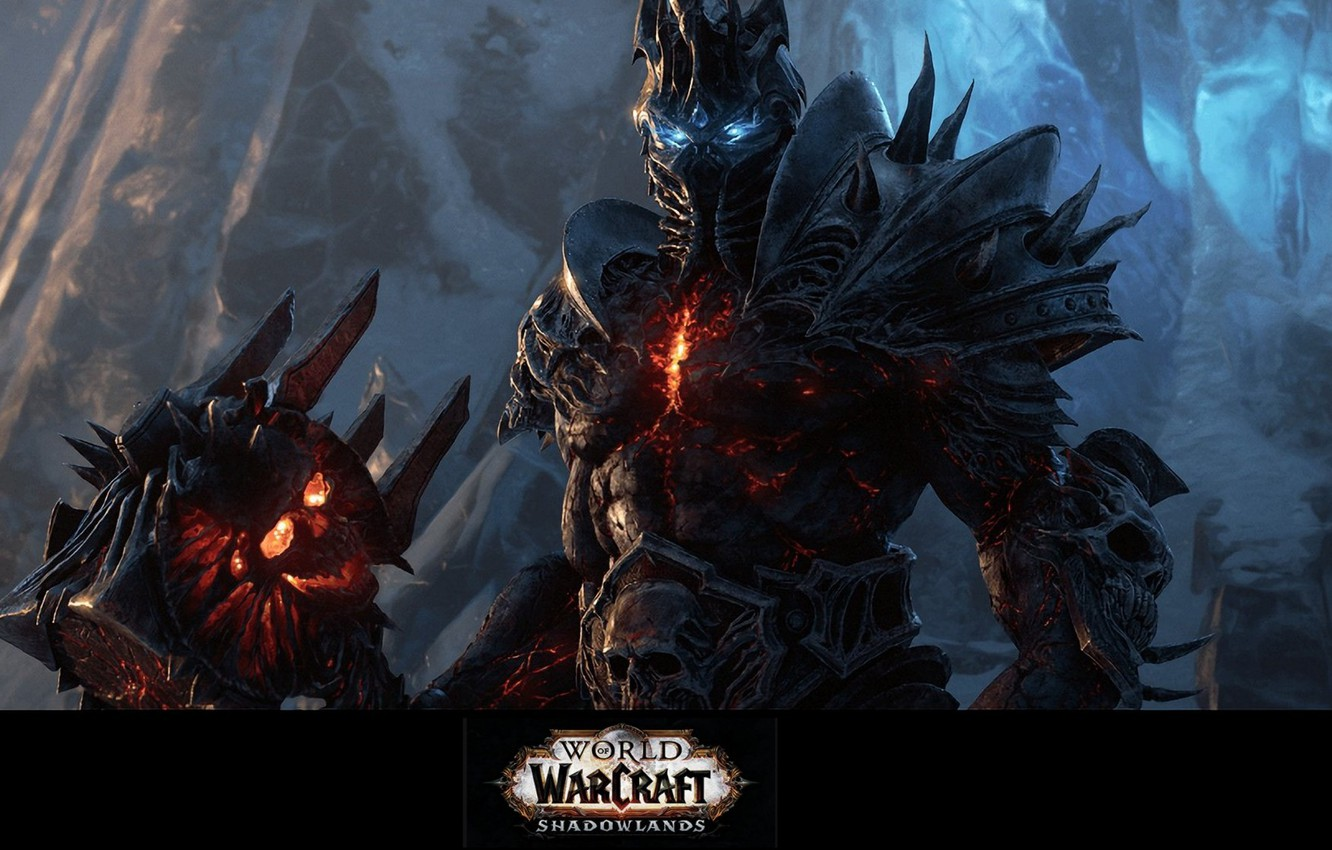